# **Phases 1 and 2 Revisited**

## *Prompt*

**Microsoft's Making Moves into Movies**

>* What types of movies are performing the best a the box offices?
>* What actions should they take based on the data?

## *Questions*

---
**What questions will guide my process?**

>* **Q1:What genres show the best performance?**
    * What is the best way to evaluate the *profitability* of the movies?
        * Gross
        * Profit
        * ROI
    * What is the best way to determine the best *quality* of each movie?
>
>
>* **Q2:How do we determine the "best" features?**
    * Which features would have the greatest impact on each of the performance metrics?
    * How to optimize for all three metrics?
>
>
>* **Q3:What release times are best for gross value?**
    * Seasons vs. Quarters?
        * *Would it make more sense either way? Could there be a benefit for inferences/predictions via LinReg modeling?*
>
>
>* **Q4:Which directors show the strongest/weakest performance?**
    * Get director names, ID
    * Add names to dataframe including the movie ID and gross performance/highest reviews
>
>
>* **Q5:What features would give the strongest indications of performance?**
>
>
>* **Q6:How can we determine whether or not a movie is "successful" or not?**

---

**Goals:**
>
>* **Determine KPIs**
    * How to measure a movie's success?
>
>
>* **Use linear regression modeling to determine the top 5 features for each target.**
    * To what degree do the features overlap?
    * What would be the top 3-5 features on which to focus to create the "best" movie (balancing all of the metrics)?

---

## 🎇 **WIP Current Status** 🎇

>*Update this section after each coding session - quick review/AAG overview of what is done and what is do-do*
>
>*Imagine its a scrum/kanban board in the notebook*

### **Done**

>* **Data Cleaning:** pulled, df'ed, coverted datatypes, filled "N/A" values
>
>
>* **FE:** 
>   * Months, Seasons, Quarters
>   * Genres to list, then to individual rows
>   * Profit and ROI metrics
>
>
>* **Visualizations:**
>   * Seasonal performance - gross, profit, ROI

### ✨**To-Do**✨

>* MultiCollinearity and Correlations
>   * ✨ Which features to compare against each other?
>   * ✨ How to create the matrix with these features?
>
>
>* Statistical Testing
>
>
>* LinReg
>   * ✨ OHE for inferential or not?
>   * ✨
>
>
---

## *Process*

>1. Import .csv's
>2. Clean data
>3. EDA w. visuals
>4. **Determine initial insights and actions**
>5. Create new features
>6. Test for correlations/multicollinearity
>7. Perform statistical testing
>8. Create LinReg model for **inference**
>9. Create LinReg model for **predictions**
>10. **Present final results for inferences, predictions**
    1. Include initial, final insights and recommendations

# **Imports**

## Packages

In [145]:
## Accessing stored data
import csv
import os,glob

## Data exploration and statistics
import pandas as pd
import numpy as np

## Creating Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling - Statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sms

# Modeling - SKLearn
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV

## Settings
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_context('notebook', font_scale=1.25)

## Data

In [2]:
## Creating list of files to loop through for data
data_folder = 'zippedData/'
data_files = glob.glob(f'{data_folder}*.csv*')
data_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [3]:
## Looping through individual data files

## Code adapted from James Irving
## Source: youtube.com/watch?v=rufvTgBEYN8&list=PLFknVelSJiSxSwXifV_ysDg50fzbuTzVt&index=41

clean_file_names = {}
split = '-----'*25

for file in data_files:
    name = file.replace('.csv.gz','').split('\\')[-1].replace('.','_')
    print(split)
    
    print(f"Preview of {name}:")
    clean_file_names[name] = pd.read_csv(file)
    display(clean_file_names[name].head(5))
    print()

-----------------------------------------------------------------------------------------------------------------------------
Preview of bom_movie_gross:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_name_basics:


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_akas:


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.00
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.00
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.00



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_basics:


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_crew:


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_principals:


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_ratings:


,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21



-----------------------------------------------------------------------------------------------------------------------------
Preview of tmdb_movies:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186



-----------------------------------------------------------------------------------------------------------------------------
Preview of tn_movie_budgets:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# **Data Cleaning**

## Slicing Individual DataFrames

In [4]:
## Selecting for genre details
title_basics = clean_file_names['imdb_title_basics']
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


In [5]:
## Selecting for budget and gross details
movie_basics = clean_file_names['tn_movie_budgets']
movie_basics

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
## Selecting for gross details
movie_gross = clean_file_names['bom_movie_gross']
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


## Merging Dataframes

In [7]:
## Merging title_basics and movie_basics on primary title

merged_basics_primary = pd.merge(title_basics,movie_basics, 
                                 left_on= 'primary_title', right_on= 'movie')
merged_basics_primary

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,nan,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.00,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,nan,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,nan,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [8]:
# ## Deprecated - focused on larger data set - Merging title_basics and movie_basics on original title

# merged_basics_original = pd.merge(title_basics,movie_basics, 
#                                   left_on= 'original_title', right_on= 'movie')
# merged_basics_original

In [9]:
df = merged_basics_primary.copy()

### Removing Redundant "Movie" Column

In [10]:
## Verifying all titles/movies match - slower than np.where()
# df[df.loc[:,'primary_title'] != df.loc[:,'movie']]

In [11]:
## Verifying all titles/movies match - np.where faster than logical slicing

for x in np.where((df.loc[:,'primary_title'] != df.loc[:,'movie']),1,0):
    if x == 1:
        print(x)

In [12]:
## Dropping redundant "movie" column -  incl t/e to be able to rerun notebook

for col in df.columns:
    try:
        df.drop('movie', axis=1, inplace=True)
    except:
        pass
    
## Confirming removal
'movie' in df.columns

False

## Converting Currencies from Str to Int

In [13]:
## Converting gross amounts from strings to integers and removing 

dollar_to_int = ['production_budget','worldwide_gross','domestic_gross']

for i in dollar_to_int:
    try:
        df[i] = df[i].map((lambda x: int(x.replace('$','').replace(',',''))))

    except Exception:
        print('---'*25)
        print('Already converted.')
        print()
        
    display(df[i][:3])

0    45000000
1    20000000
2      200000
Name: production_budget, dtype: int64

0        73706
1    122133227
2      1165996
Name: worldwide_gross, dtype: int64

0           0
1    70433227
2     1109808
Name: domestic_gross, dtype: int64

## Filling Null Values with "Missing"

In [14]:
## Filling null values with "missing" to allow for processing later

df_filled = df.fillna('Missing').copy()
display(df.isna().sum())
display(df_filled.isna().sum())

tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      487
genres                72
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [15]:
df[df['runtime_minutes'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,nan,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227
15,tt5108902,The Three Stooges,The Three Stooges,2015,nan,Documentary,4,"Apr 13, 2012",30000000,44338224,54052249
75,tt5643994,Silence,Silence,2018,nan,Thriller,42,"Dec 23, 2016",46500000,7100177,23726626
76,tt6504712,Silence,Silence,2017,nan,Drama,42,"Dec 23, 2016",46500000,7100177,23726626
89,tt7821100,The Illusionist,The Illusionist,2016,nan,Documentary,22,"Aug 18, 2006",16500000,39868642,83792062
...,...,...,...,...,...,...,...,...,...,...,...
3804,tt9248762,The Terrorist,The Terrorist,2018,nan,Thriller,48,"Jan 14, 2000",25000,195043,195043
3808,tt9448858,The Magic Flute,The Magic Flute,2010,nan,Music,18,"Dec 31, 2006",27000000,0,0
3810,tt9678962,Fuel,Fuel,2018,nan,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255
3811,tt9729206,Diner,Diner,2019,nan,Crime,11,"Apr 2, 1982",5000000,12592907,12592907


# **Feature Engineering**

## Creating Seasons and Quarters

### Datetime Approach

In [16]:
## Changing release date to datetime datatype

df_filled['release_datetime'] = pd.to_datetime(df_filled['release_date'])
df_filled['release_datetime']

0      2012-12-31
1      1995-08-18
2      2015-06-19
3      2015-06-19
4      2013-03-22
          ...    
3810   2008-11-14
3811   1982-04-02
3812   2008-08-27
3813   2004-10-29
3814   2007-03-13
Name: release_datetime, Length: 3815, dtype: datetime64[ns]

In [17]:
## Using datetime dtype to create months column
df_filled['release_month_dt'] = df_filled['release_datetime'].dt.month_name()
df_filled['release_month_dt']

0       December
1         August
2           June
3           June
4          March
          ...   
3810    November
3811       April
3812      August
3813     October
3814       March
Name: release_month_dt, Length: 3815, dtype: object

In [18]:
df_filled['release_quarter'] = df_filled['release_datetime'].dt.quarter
df_filled['release_quarter']

0       4
1       3
2       2
3       2
4       1
       ..
3810    4
3811    2
3812    3
3813    4
3814    1
Name: release_quarter, Length: 3815, dtype: int64

### Manual Approach

In [19]:
## Inspecting original values
df_filled['release_date'][:5]

0    Dec 31, 2012
1    Aug 18, 1995
2    Jun 19, 2015
3    Jun 19, 2015
4    Mar 22, 2013
Name: release_date, dtype: object

In [20]:
## Pulling month
test_month = df_filled['release_date'][0][:3]
test_month

'Dec'

In [21]:
## Creating new column for the month of each release date
release_month = []

for movie in df_filled['release_date']:
    release_month.append(movie[:3])
    
df_filled['release_month_manual'] = release_month

In [22]:
## Using map and lambda functions to slice out month from string
df_filled['release_month_manual'] = df_filled['release_date'].map(lambda x: x[:3])
df_filled['release_month_manual']

0       Dec
1       Aug
2       Jun
3       Jun
4       Mar
       ... 
3810    Nov
3811    Apr
3812    Aug
3813    Oct
3814    Mar
Name: release_month_manual, Length: 3815, dtype: object

In [23]:
## Creating seasons based on meteorological definitions of each season
season = []

for month in df_filled['release_month_manual']:
    if month == 'Jan':
        season.append('Winter')
    elif month == 'Feb':
        season.append('Winter')
    elif month == 'Mar':
        season.append('Spring')
    elif month == 'Apr':
        season.append('Spring')
    elif month == 'May':
        season.append('Spring')
    elif month == 'Jun':
        season.append('Summer')
    elif month == 'Jul':
        season.append('Summer')
    elif month == 'Aug':
        season.append('Summer')
    elif month == 'Sep':
        season.append('Fall')
    elif month == 'Oct':
        season.append('Fall')
    elif month == 'Nov':
        season.append('Fall')
    elif month == 'Dec':
        season.append('Winter')
    else:
        print('na')

df_filled['release_season_manual'] = season
df_filled['release_season_manual']

0       Winter
1       Summer
2       Summer
3       Summer
4       Spring
         ...  
3810      Fall
3811    Spring
3812    Summer
3813      Fall
3814    Spring
Name: release_season_manual, Length: 3815, dtype: object

### Reviewing Changes

In [24]:
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month_dt,release_quarter,release_month_manual,release_season_manual
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,August,3,Aug,Summer
2,tt0326592,The Overnight,The Overnight,2010,88.00,Missing,21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,June,2,Jun,Summer
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,June,2,Jun,Summer
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,2013-03-22,March,1,Mar,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Missing,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,2008-11-14,November,4,Nov,Fall
3811,tt9729206,Diner,Diner,2019,Missing,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,1982-04-02,April,2,Apr,Spring
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,August,3,Aug,Summer
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,October,4,Oct,Fall


## Creating Profit and ROI

In [25]:
df_filled['profit'] = df_filled['worldwide_gross'] - df_filled['production_budget']
df_filled['profit'] 

0       -44926294
1       102133227
2          965996
3          965996
4       -15686698
          ...    
3810     -2325745
3811      7592907
3812      5882226
3813     84823094
3814     -1800000
Name: profit, Length: 3815, dtype: int64

In [26]:
df_filled['ROI'] = (df_filled['worldwide_gross'] - df_filled['production_budget'])/df_filled['production_budget']
df_filled['ROI']

0      -1.00
1       5.11
2       4.83
3       4.83
4      -0.63
        ... 
3810   -0.93
3811    1.52
3812    0.27
3813    2.12
3814   -1.00
Name: ROI, Length: 3815, dtype: float64

# **Analysis**

## Q1: What genres perform the best?

### Splitting Genres into Lists

In [27]:
# ## Via map & lambda - slower than .str
# df_filled['genres_list'] = df_filled['genres'].map(lambda x: x.split(','))
# df_filled

In [29]:
## Via .str and string methods (faster than map/lambda)
df_filled['genres_str'] = df_filled['genres'].str.title().str.split(',')
df_filled['genres_str']

0        [Action, Animation, Comedy]
1       [Action, Adventure, Fantasy]
2                          [Missing]
3                  [Comedy, Mystery]
4        [Adventure, Drama, Romance]
                    ...             
3810            [Documentary, Sport]
3811                         [Crime]
3812        [Action, Drama, Romance]
3813                         [Crime]
3814                   [Documentary]
Name: genres_str, Length: 3815, dtype: object

# **Visualizations**

In [30]:
## Creating separate df for plotting with each genre on a separate row
plot_df = df_filled.explode('genres_str')
plot_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month_dt,release_quarter,release_month_manual,release_season_manual,profit,ROI,genres_str
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter,-44926294,-1.00,Action
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter,-44926294,-1.00,Animation
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter,-44926294,-1.00,Comedy
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,August,3,Aug,Summer,102133227,5.11,Action
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,August,3,Aug,Summer,102133227,5.11,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,August,3,Aug,Summer,5882226,0.27,Action
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,August,3,Aug,Summer,5882226,0.27,Drama
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,August,3,Aug,Summer,5882226,0.27,Romance
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,October,4,Oct,Fall,84823094,2.12,Crime


## Total Worldwide Gross per Genre

In [31]:
## Defining a function to perform aggregation and plot the data

def sort_genres_sum(df, col_to_sort, agg='sum', verbose=True):
    '''Creates a new dataframe from a given dataframe created by the sum of
    all values for each genre, then sorted by the specified column name.
    
    Args & kwargs:
    df - original dataframe to be sorted
    col_to_sort - column name (str) by which to sort the data
    '''
    ## Adding functionality to handle different aggregation methods
    if agg == 'sum':
        agg_func = np.sum
        agg_title = 'Total'
    elif agg == 'median':
        agg_func = np.median
        agg_title = 'Median'
    else:
        agg_func = np.mean
        agg_title = 'Average'
    
    ## Determining performance rankings and creating a list of names for viz
    idx = list(df.groupby("genres_str", as_index=True).agg(agg_func).sort_values(by = col_to_sort, ascending=False).index)
    
    ## Graphing results of agg function ordered by index (above)
    fig = plt.figure(figsize=(15,4))
    sns.barplot(data=df, x= 'genres_str', y= col_to_sort, order = idx, estimator = agg_func)
    plt.xticks(rotation=45, ha= 'right')
    plt.suptitle(f'Total {col_to_sort.title().replace("_", " ")} by Genre')
    plt.xlabel('Genres')
    plt.ylabel(f'Total {col_to_sort.title().replace("_", " ")}');
    
    ## Adding option to turn off dataframe showing results
    if verbose == True:
        display(df.sort_values(col_to_sort, ascending=False))
    
    return fig

In [32]:
# df_filled.columns

In [33]:
# df_filled.sort_values('domestic_gross')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month_dt,release_quarter,release_month_manual,release_season_manual,profit,ROI,genres_str
1747,tt1775309,Avatar,Abatâ,2011,93.00,Horror,1,"Dec 18, 2009",425000000,760507625,2776345279,2009-12-18,December,4,Dec,Winter,2351345279,5.53,Horror
2776,tt8852130,Titanic,Titanic,2018,115.00,Family,43,"Dec 19, 1997",200000000,659363944,2208208395,1997-12-19,December,4,Dec,Winter,2008208395,10.04,Family
2775,tt2495766,Titanic,Titanic,2012,Missing,Adventure,43,"Dec 19, 1997",200000000,659363944,2208208395,1997-12-19,December,4,Dec,Winter,2008208395,10.04,Adventure
3360,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",300000000,678815482,2048134200,2018-04-27,April,2,Apr,Spring,1748134200,5.83,Sci-Fi
3360,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",300000000,678815482,2048134200,2018-04-27,April,2,Apr,Spring,1748134200,5.83,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,tt2271563,Forsaken,Forsaken,2015,90.00,"Action,Drama,Western",54,"Feb 19, 2016",18000000,0,0,2016-02-19,February,1,Feb,Winter,-18000000,-1.00,Drama
2563,tt2271563,Forsaken,Forsaken,2015,90.00,"Action,Drama,Western",54,"Feb 19, 2016",18000000,0,0,2016-02-19,February,1,Feb,Winter,-18000000,-1.00,Action
2558,tt2263814,The Maid's Room,The Maid's Room,2013,98.00,Thriller,18,"Aug 8, 2014",600000,0,0,2014-08-08,August,3,Aug,Summer,-600000,-1.00,Thriller
2521,tt2237914,Aztec Warrior,Aztec Warrior,2016,Missing,"Action,Comedy",97,"Dec 31, 2015",5000000,0,0,2015-12-31,December,4,Dec,Winter,-5000000,-1.00,Comedy


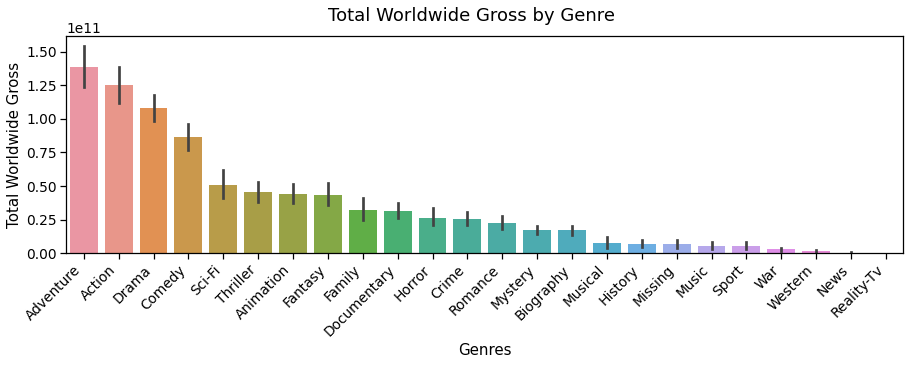

In [34]:
## Testing Function

sort_genres_sum(plot_df, col_to_sort='worldwide_gross', agg='sum');

**Observations:**
>* **Top three genres:** Adventure, Action, Drama
>* **Lowest three genres:** Western, News, Reality-TV
>* On this graph, musicals are ranked much lower due to their smaller total gross box office sales (versus calculating the average of all gross values).

**Suggestions**
>* **Safest Genres (by Gross)** are the top three genres
    * Lowest points on the error bars indicate high performance even at their worst.
>* **Select from:** Action, Animation, Adventure, Fantasy, Sci-Fi, Family, or Musicals
    * All others show poor performance

## Average Gross per Genre

In [35]:
## Defining a function to perform aggregation and plot the data

def sort_genres_avg(df, col_to_sort):
    '''Creates a new dataframe from a given dataframe created by the average of
    all values for each genre, then sorted by the specified column name.
    
    Args & kwargs:
    df - original dataframe to be sorted
    col_to_sort - column name (str) by which to sort the data"'''
    
    df1 = df.groupby("genres_str").mean().reset_index().sort_values(by = col_to_sort, ascending=False)

    plt.figure(figsize=(15,4))
    sns.barplot(data=df1, x= 'genres_str', y= col_to_sort )
    plt.xticks(rotation=45, ha= 'right')
    plt.suptitle('Average Worldwide Gross by Genre')
    plt.xlabel('Genres')
    plt.ylabel('Total Worldwide Gross ($)');
    
    return df1.head(5)

,genres_str,start_year,id,production_budget,domestic_gross,worldwide_gross,release_quarter,profit,ROI
2,Animation,2014.47,47.68,80393016.85,111624579.22,299792394.48,2.55,219399377.63,4.91
1,Adventure,2014.48,49.29,87224767.56,101639522.65,282314618.24,2.57,195089850.68,2.06
19,Sci-Fi,2014.52,53.08,64281067.13,83525870.97,222667066.73,2.56,158385999.60,2.02
14,Musical,2015.06,52.77,39391121.34,99659998.57,222123427.00,2.66,182732305.66,9.33
9,Fantasy,2014.34,50.75,65917549.45,81021718.48,215878462.57,2.44,149960913.12,5.29


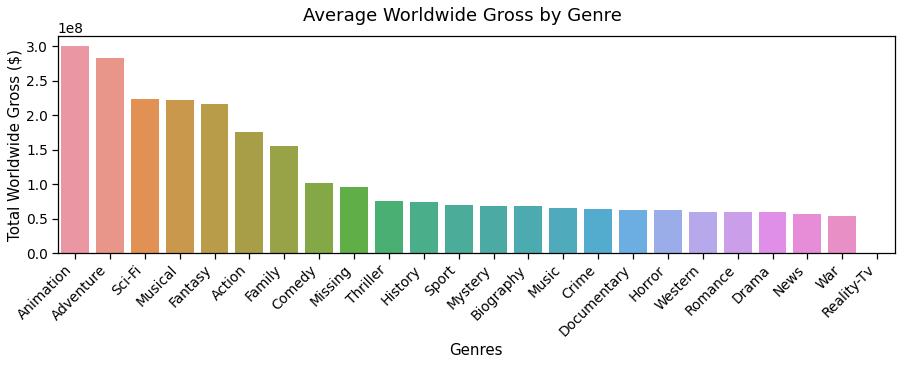

In [36]:
sort_genres_avg(plot_df, col_to_sort='worldwide_gross')

#### Old Code - Saving just in case

In [37]:
# ## Visualizing sorted sum 

# df_sorted = sort_genres_sum(plot_df, 'worldwide_gross')

# plt.figure(figsize=(15,4))
# sns.barplot(data=df_sorted, x= 'genres_str', y='worldwide_gross')
# plt.xticks(rotation=45, ha= 'right')
# plt.suptitle('Total Worldwide Gross by Genre')
# plt.xlabel('Genres')
# plt.ylabel('Total Worldwide Gross ($)');

In [38]:
# ## Visualizing sorted average 

# avg_sorted = sort_genres_avg(plot_df, 'worldwide_gross')

# plt.figure(figsize=(15,4))
# sns.barplot(data=avg_sorted, x= 'genres_str', y='worldwide_gross')
# plt.xticks(rotation=45, ha= 'right')
# plt.suptitle('Total Worldwide Gross by Genre')
# plt.xlabel('Genres')
# plt.ylabel('Total Worldwide Gross ($)');

In [39]:
# def sort_genres_avg(df, col_to_sort):
#     '''Creates a new dataframe from a given dataframe created by the average of
#     all values for each genre, then sorted by the specified column name.
    
#     Args & kwargs:
#     df - original dataframe to be sorted
#     col_to_sort - column name (str) by which to sort the data"'''
    
#     df1 = df.groupby("genres_str").agg('mean').reset_index().sort_values(by = col_to_sort, ascending=False)
    
#     return df1

In [40]:
# ## First version of visualizing results - 

# plt.figure(figsize=(15,4))
# sns.barplot(data=plot_df, x= 'genres_str', y='worldwide_gross')#, order=sum_gross_ww)
# plt.xticks(rotation=45, ha= 'right')
# plt.suptitle('Worldwide Gross by Genre')
# plt.xlabel('Genres')
# plt.ylabel('Worldwide Gross ($)');

In [41]:
# ## Not working - attempted to create function to sort and visualize
# def visualize_metrics(df, col_to_sort, sort_order):
    
#     df_sorted = df.groupby("genres_str").sum().reset_index().sort_values(by = col_to_sort, ascending=False)
    
#     plt.figure(figsize=(15,4))
#     sns.barplot(data=df_sorted, x= 'genres_str', y=col_to_sort, order=sort_order)
#     plt.xticks(rotation=45, ha= 'right')
#     plt.suptitle('Worldwide Gross by Genre')
#     plt.xlabel('Genres')
#     plt.ylabel(col_to_sort);
    
#     return

## ROI per Genre

In [42]:
## Creating list of genres based on average ROI for graphing purposes

mean_roi = list(plot_df.groupby("genres_str").mean()['ROI'].sort_values(ascending=False).index)
# mean_roi

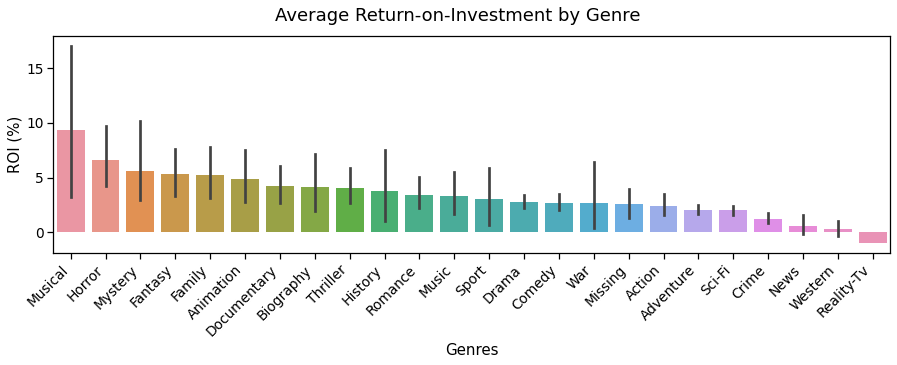

In [43]:
## Visualizing Average Worldwide Gross per Genre

plt.figure(figsize=(15,4))
sns.barplot(data=plot_df, x= 'genres_str', y='ROI', order=mean_roi)
plt.xticks(rotation=45, ha= 'right')
plt.suptitle('Average Return-on-Investment by Genre')
plt.xlabel('Genres')
plt.ylabel('ROI (%)');

**Observations:**
>* **Top three genres:** Animation, Adventure, and Sci-Fi
>* **Lowest three genres:** Reality-TV, War and News
>* *Musicals are a high-risk, high-reward option*
    * Their gross can exceed Animation, or fall below the top 5 genres.

**Suggestions**
>* **Safest Genres (by Gross)** are the top three genres
    * Lowest points on the error bars indicate high gross performance even at their worst
>* Select from Action, Animation, Adventure, Fantasy, Sci-Fi, Family, or Musicals
    * All others show poor performance

### **A1: Top Genres**

>* List mean, roi for evaluations

## Visualizing Seasonal Performance

### Seasonal Performance - All Movies (ROI)

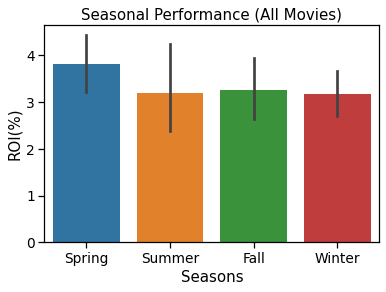

In [44]:
## Creating basic overview
g = sns.barplot(data=plot_df, x='release_season_manual', y='ROI', 
                order=['Spring', 'Summer', 'Fall', 'Winter'], 
                estimator=np.mean)
g.set_xlabel('Seasons')
g.set_ylabel('ROI(%)')
g.set_title('Seasonal Performance (All Movies)');

### Seasonal Performance - All Movies (Ww Gross)

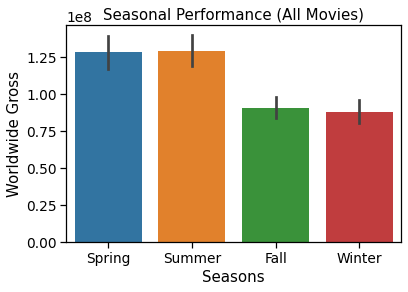

In [45]:
## Creating basic overview
g = sns.barplot(data=plot_df, x='release_season_manual', y='worldwide_gross', 
                order=['Spring', 'Summer', 'Fall', 'Winter'], 
                estimator=np.mean)
g.set_xlabel('Seasons')
g.set_ylabel('Worldwide Gross')
g.set_title('Seasonal Performance (All Movies)');

**Observations:**
>* Summer is the best season for releases, with winter being the worst time.
>* Summer and Spring seasons seem to be the most productive seasons.
>* Fall and Winter perform worse.

**Suggestions**
>* Focus release times in Summer/Spring
>* Avoid Fall/Winter

### Genre Performance by Season

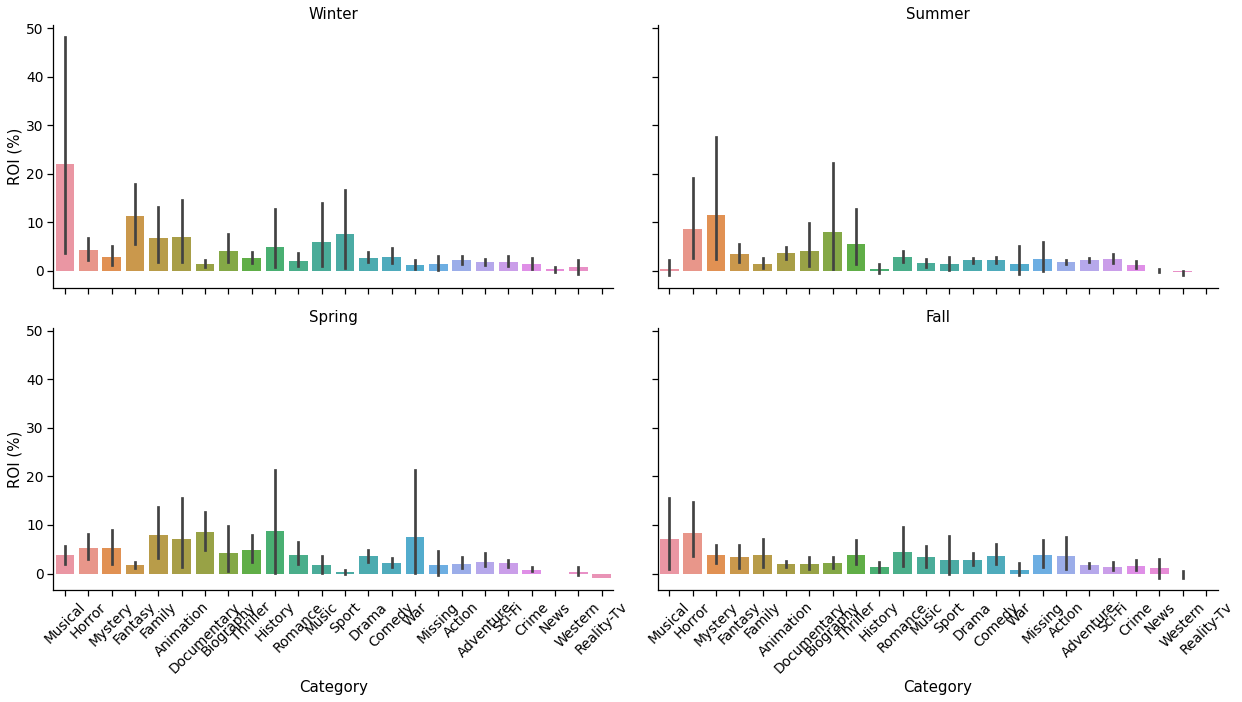

In [46]:
## Visualizing each genre's performance by season
g = sns.catplot(data=plot_df, col='release_season_manual',
            y='ROI', kind='bar', x='genres_str', col_wrap=2, 
            aspect=1.75, order=mean_roi)
(g.set_axis_labels('Category', 'ROI (%)')
 .set_xticklabels(rotation=45)
 .set_titles("{col_name}"))
 
plt.tight_layout();

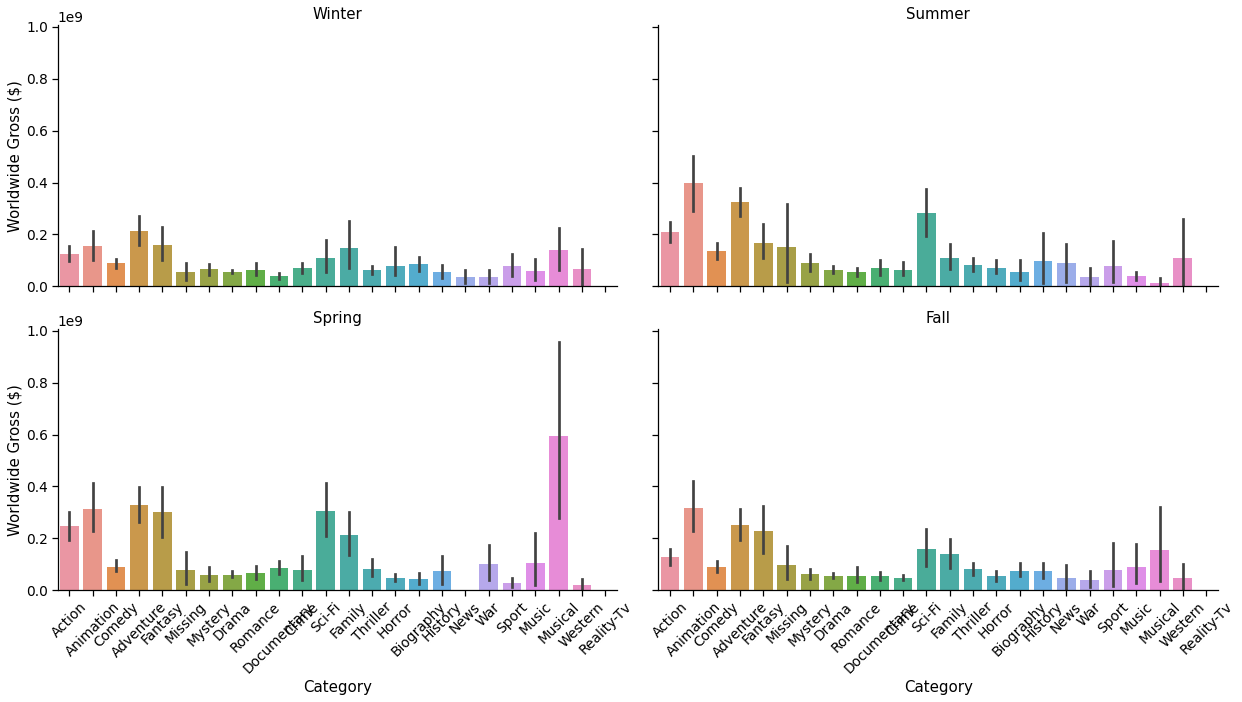

In [47]:
## Visualizing each genre's performance by season
g = sns.catplot(data=plot_df, col='release_season_manual',
            y='worldwide_gross', kind='bar', x='genres_str', col_wrap=2, 
            aspect=1.75)#, sharex=False)
(g.set_axis_labels('Category', 'Worldwide Gross ($)')
 .set_xticklabels(rotation=45)
 .set_titles("{col_name}"))
 
plt.tight_layout();

**Observations:**
>* Springtime releases show highest gross performance on average
>* Wintertime shows lowest performances across all genres
>* The results match up with our overall view for all genres

**Suggestions**
>* To maximize profitability of musicals, release in spring
>* Avoid releasing Animations in the winter - all other seasons perform better
>* Avoid releasing news-related movies in the Spring

## Seasonal Performance -  Insights

**Observations:**
>
>The top five genres tend to perform relatively well regardless of the season with little difference between each season.
>
> Musicals show a strongest performance in the springtime - it is only worthwhile to release a musical in the spring.
>
**Questions**
> 
>What is the profitability and return on investment for each genre?

## Quarterly Performance

How would the data look when comparing seasons to quarters?

In [48]:
## Sorting by release quarters for graphing
df_filled.sort_values('release_quarter', inplace=True)
df_filled.reset_index(drop=True, inplace=True)
# df_filled

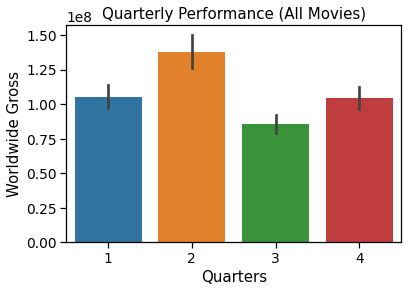

In [49]:
## Creating basic overview
g = sns.barplot(data=plot_df, x='release_quarter', y='worldwide_gross')
g.set_xlabel('Quarters')
g.set_ylabel('Worldwide Gross')
g.set_title('Quarterly Performance (All Movies)');

**Observations:**
>* 
>* 
>* 

**Suggestions**
>* 
>* 

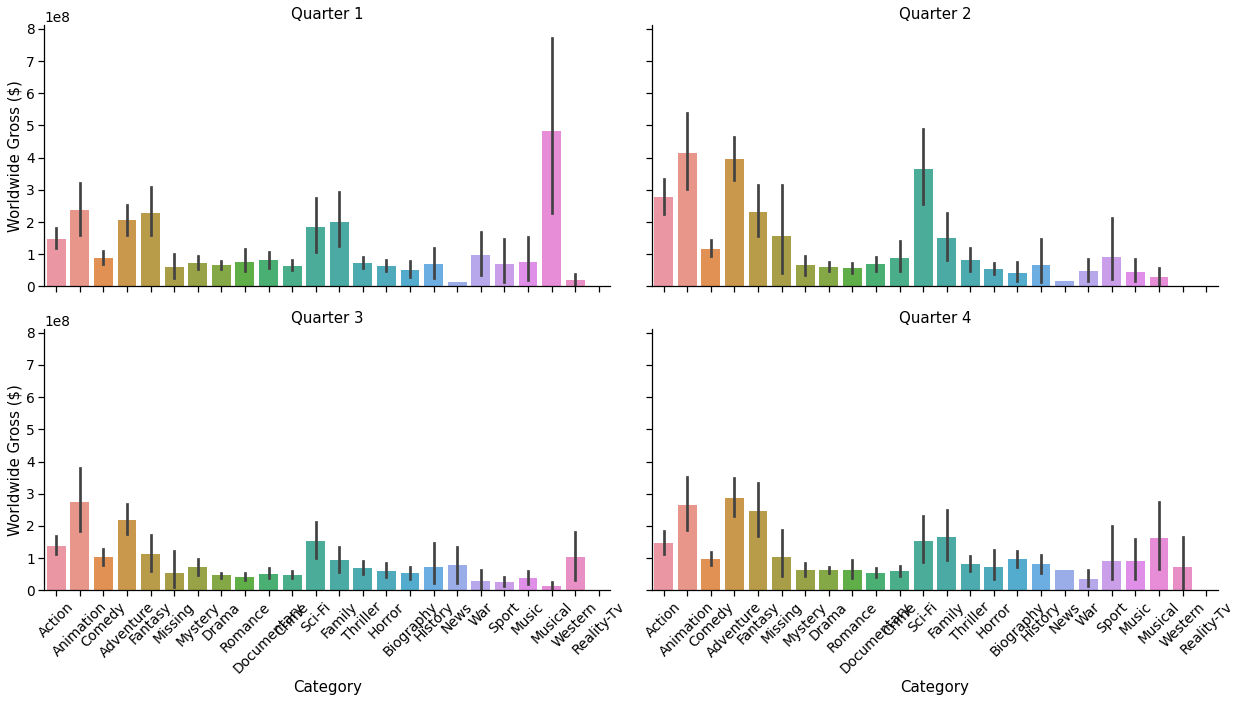

In [50]:
## Generating figure for quarterly performance breakdown
g = sns.catplot(data=plot_df, col='release_quarter',
            y='worldwide_gross', kind='bar', x='genres_str', col_wrap=2, 
            aspect=1.75)#, sharex=False)
(g.set_axis_labels('Category', 'Worldwide Gross ($)')
 .set_xticklabels(rotation=45)
 .set_titles("Quarter {col_name}"))
 
plt.tight_layout();

**Observations:**
>* 
>* 
>* 

**Suggestions**
>* 
>* 

In [51]:
# g = sns.catplot(x = 'genres_list', y='worldwide_gross', 
#                hue = 'release_quarter',data=plot_df, kind='bar', aspect=3.65)
# g.set_xticklabels(rotation=45);

In [52]:
# g = sns.catplot(x = 'genres_list', y='worldwide_gross',
#                 hue = 'release_season_manual',data=plot_df, kind='bar',
#                 aspect=3.65)
# g.set_xticklabels(rotation=45);

## **Comparing S & Q**

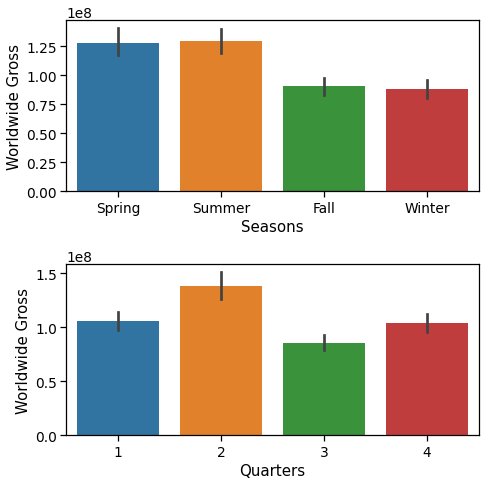

In [53]:
## Comparing Seasonal/Quarterly breakdowns

fig, axes = plt.subplots(nrows=2, figsize=(7,7))
sns.barplot(x = 'release_season_manual', y='worldwide_gross',data=plot_df, 
            ax=axes[0], order=['Spring', 'Summer', 'Fall', 'Winter'])
sns.barplot(x = 'release_quarter', y='worldwide_gross', data=plot_df,
            ax=axes[1])

## Changing settings
axes[0].set_xlabel("Seasons")
axes[0].set_ylabel('Worldwide Gross')

axes[1].set_xlabel("Quarters")
axes[1].set_ylabel('Worldwide Gross')

plt.tight_layout();

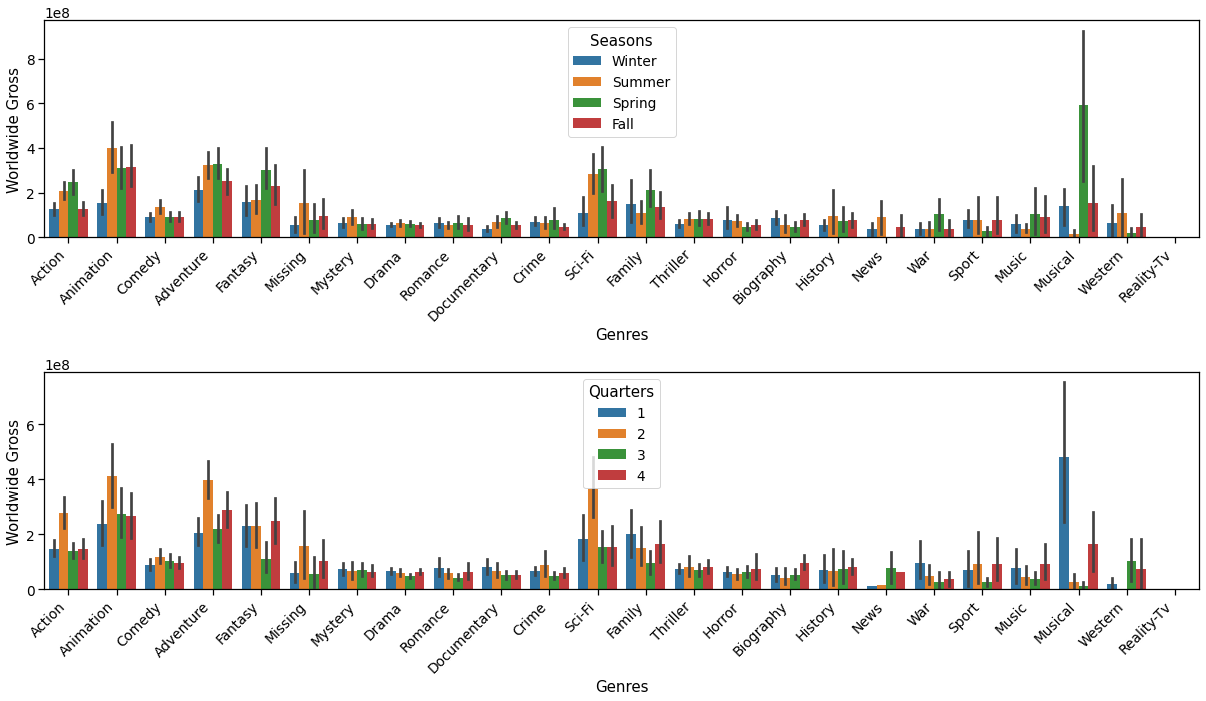

In [54]:
## Creating single visualization to compare seasonal and quarterly performances

fig, axes = plt.subplots(nrows=2, figsize=(17,10))
sns.barplot(x = 'genres_str', y='worldwide_gross',
            hue = 'release_season_manual',data=plot_df, ax=axes[0])
sns.barplot(x = 'genres_str', y='worldwide_gross', hue = 'release_quarter',
            data=plot_df, ax=axes[1])

## Changing settings
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45, ha='right')
axes[0].set_xlabel("Genres")
axes[0].set_ylabel('Worldwide Gross')
axes[0].legend(title='Seasons')

axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45, ha='right')
axes[1].set_xlabel("Genres")
axes[1].set_ylabel('Worldwide Gross')
axes[1].legend(title='Quarters')

plt.tight_layout();

**Observations:**
>* 
>* 
>* 

**Suggestions**
>* 
>* 

# ✨ TODO

* Change to "quarterly"
* Move towards linreg (feature selection)

# Modeling Pre-processing

## OHE: Genres

In [56]:
## Getting unique values for genres

unique_genres = plot_df['genres_str'].unique()
unique_genres

array(['Action', 'Animation', 'Comedy', 'Adventure', 'Fantasy', 'Missing',
       'Mystery', 'Drama', 'Romance', 'Documentary', 'Crime', 'Sci-Fi',
       'Family', 'Thriller', 'Horror', 'Biography', 'History', 'News',
       'War', 'Sport', 'Music', 'Musical', 'Western', 'Reality-Tv'],
      dtype=object)

In [ ]:
# df_filled['family'] = (df_filled['genres_str'] == 'Family').astype(int)
# df_filled#['family']

In [58]:
df_filled['genres'].str.contains('Family')

0       False
1       False
2       False
3       False
4       False
        ...  
3810    False
3811    False
3812    False
3813    False
3814    False
Name: genres, Length: 3815, dtype: bool

In [59]:
## Manually creating OHE columns for each genre

for genre in unique_genres:
    df_filled[genre] = (df_filled['genres'].str.contains(genre)).astype(int)

In [61]:
df_filled.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'id', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_datetime',
       'release_month_dt', 'release_quarter', 'release_month_manual',
       'release_season_manual', 'profit', 'ROI', 'genres_str', 'Action',
       'Animation', 'Comedy', 'Adventure', 'Fantasy', 'Missing', 'Mystery',
       'Drama', 'Romance', 'Documentary', 'Crime', 'Sci-Fi', 'Family',
       'Thriller', 'Horror', 'Biography', 'History', 'News', 'War', 'Sport',
       'Music', 'Musical', 'Western', 'Reality-Tv'],
      dtype='object')

In [66]:
try:
    df_filled.drop(columns=['genres', 'genres_str'], inplace=True)
except:
    pass

In [67]:
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,id,release_date,production_budget,domestic_gross,worldwide_gross,...,Horror,Biography,History,News,War,Sport,Music,Musical,Western,Reality-Tv
0,tt4093816,The Return,The Return,2015,92.00,43,"Feb 6, 2004",15000000,501752,5953886,...,0,0,0,0,0,0,0,0,0,0
1,tt1840309,Divergent,Divergent,2014,139.00,95,"Mar 21, 2014",85000000,150947895,276014965,...,0,0,0,0,0,0,0,0,0,0
2,tt1839642,The Face of Love,The Face of Love,2013,92.00,29,"Mar 7, 2014",4000000,385069,1158877,...,0,0,0,0,0,0,0,0,0,0
3,tt6950432,Red Sky,Ciel rouge,2017,91.00,27,"Mar 10, 2015",25000000,0,91116,...,0,0,0,0,1,0,0,0,0,0
4,tt3396636,Red Sky,Red Sky,2013,56.00,27,"Mar 10, 2015",25000000,0,91116,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt5263832,Pinocchio,Pinocchio,2015,75.00,24,"Dec 25, 2002",45000000,3681811,31681811,...,0,0,0,0,0,0,0,0,0,0
3811,tt10118052,Believe,Believe,2018,16.00,13,"Dec 2, 2016",3500000,890303,890303,...,0,0,0,0,0,0,0,0,0,0
3812,tt2009606,Believe,Believe,2013,96.00,13,"Dec 2, 2016",3500000,890303,890303,...,0,0,0,0,0,1,0,0,0,0
3813,tt2267998,Gone Girl,Gone Girl,2014,149.00,36,"Oct 3, 2014",61000000,167767189,368567189,...,0,0,0,0,0,0,0,0,0,0


# Correlations/Multicollinearity

In [68]:
# ## Code copied from P2proj

## Determining each feature's relationship with price

## 1. Drop categorical columns
## 2. Create correlation with target variable 
## 3. Display top/bottom 5 values

# df_corr = df.drop(['price', 'id', 'lat','long'], axis=1).corrwith(df['price']).sort_values(ascending=False)
# display(df_corr[0:5],df_corr[-6:-1])

In [69]:
# ## Attempted to create a loop to check the datetype and add to a list for columns


# # for each runtime in the column, check if it is not a string
# #  if it is not, then zip that value with the value in the "primary_title" column
# #  then, add the zipped value to a list
# # finally, print the final list

# cat_col_list = []

# for i in col_list:
#     for n in range(len(col_list)):
#         if type(i[n]) == float:
# #             cat_col_list.append(i)
#             print(i)
        
# # cat_col_list

In [70]:
## Realized I can't treat the 'runtime' column as either cat/col due to mixed dt w/in col

# display(list(df_filled.columns))

# display(list(df_filled.dtypes))

In [71]:
## Identifying datatypes for each title to split into cat/cont/drop lists
cat_col = list(zip(list(df_filled.columns),list(df_filled.dtypes)))
cat_col

[('tconst', dtype('O')),
 ('primary_title', dtype('O')),
 ('original_title', dtype('O')),
 ('start_year', dtype('int64')),
 ('runtime_minutes', dtype('O')),
 ('id', dtype('int64')),
 ('release_date', dtype('O')),
 ('production_budget', dtype('int64')),
 ('domestic_gross', dtype('int64')),
 ('worldwide_gross', dtype('int64')),
 ('release_datetime', dtype('<M8[ns]')),
 ('release_month_dt', dtype('O')),
 ('release_quarter', dtype('int64')),
 ('release_month_manual', dtype('O')),
 ('release_season_manual', dtype('O')),
 ('profit', dtype('int64')),
 ('ROI', dtype('float64')),
 ('Action', dtype('int32')),
 ('Animation', dtype('int32')),
 ('Comedy', dtype('int32')),
 ('Adventure', dtype('int32')),
 ('Fantasy', dtype('int32')),
 ('Missing', dtype('int32')),
 ('Mystery', dtype('int32')),
 ('Drama', dtype('int32')),
 ('Romance', dtype('int32')),
 ('Documentary', dtype('int32')),
 ('Crime', dtype('int32')),
 ('Sci-Fi', dtype('int32')),
 ('Family', dtype('int32')),
 ('Thriller', dtype('int32')),
 

In [74]:
## Breaking out each feature into either categorical/continuous/"to be dropped"

targets = ['profit','ROI']

cont_feat = ['start_year','production_budget']

cat_feat = ['release_month_dt','release_quarter','release_season_manual']

drop_feat = ['id','tconst','primary_title','original_title','release_datetime',
        'runtime_minutes','release_date','release_month_manual','domestic_gross','worldwide_gross']

In [75]:
## Creating a new dataframe for correlation matrix

df_for_corr = df_filled.drop(columns = drop_feat).copy().reset_index(drop=True)
df_for_corr

,start_year,production_budget,release_month_dt,release_quarter,release_season_manual,profit,ROI,Action,Animation,Comedy,...,Horror,Biography,History,News,War,Sport,Music,Musical,Western,Reality-Tv
0,2015,15000000,February,1,Winter,-9046114,-0.60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,85000000,March,1,Spring,191014965,2.25,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,4000000,March,1,Spring,-2841123,-0.71,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,25000000,March,1,Spring,-24908884,-1.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2013,25000000,March,1,Spring,-24908884,-1.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,2015,45000000,December,4,Winter,-13318189,-0.30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3811,2018,3500000,December,4,Winter,-2609697,-0.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3812,2013,3500000,December,4,Winter,-2609697,-0.75,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3813,2014,61000000,October,4,Fall,307567189,5.04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_corr = df_for_corr.corrwith(df_for_corr['profit']).sort_values(ascending=False)
df_corr
# display(df_corr[0:5],df_corr[-6:-1])

profit               1.00
production_budget    0.64
Adventure            0.32
Animation            0.20
Action               0.16
Sci-Fi               0.15
ROI                  0.14
Fantasy              0.13
Musical              0.07
Family               0.07
Music                0.03
Comedy               0.03
start_year           0.01
Missing              0.00
News                -0.01
Sport               -0.01
release_quarter     -0.02
Western             -0.02
History             -0.02
War                 -0.02
Mystery             -0.03
Biography           -0.03
Thriller            -0.03
Horror              -0.04
Romance             -0.05
Crime               -0.05
Documentary         -0.06
Drama               -0.15
Reality-Tv            nan
dtype: float64

In [77]:
## Creating function to provide correlation matrix to determine multicollinearity

def calc_df_corr(df, list_cats, target_col):
    '''Identifying correlations within the data'''
    
    df_corr = df.drop(list_cats, axis=1).corrwith(df[target_col]).sort_values(ascending=False)
    
#     display(df_corr[0:5],df_corr[-6:-1])
    
    return df_corr

In [78]:
calc_df_corr(df=df_for_corr, list_cats=cat_feat, target_col = 'profit')

profit               1.00
production_budget    0.64
Adventure            0.32
Animation            0.20
Action               0.16
Sci-Fi               0.15
ROI                  0.14
Fantasy              0.13
Musical              0.07
Family               0.07
Music                0.03
Comedy               0.03
start_year           0.01
Missing              0.00
News                -0.01
Sport               -0.01
Western             -0.02
History             -0.02
War                 -0.02
Mystery             -0.03
Biography           -0.03
Thriller            -0.03
Horror              -0.04
Romance             -0.05
Crime               -0.05
Documentary         -0.06
Drama               -0.15
Reality-Tv            nan
dtype: float64

# OHE

In [117]:
## Save the features that we used previously - I will use these features 
## to fit my model.

X = df_filled[[*unique_genres,*cont_feat,*cat_feat]].copy()
X

,Action,Animation,Comedy,Adventure,Fantasy,Missing,Mystery,Drama,Romance,Documentary,...,Sport,Music,Musical,Western,Reality-Tv,start_year,production_budget,release_month_dt,release_quarter,release_season_manual
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2015,15000000,February,1,Winter
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,2014,85000000,March,1,Spring
2,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,2013,4000000,March,1,Spring
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2017,25000000,March,1,Spring
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013,25000000,March,1,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2015,45000000,December,4,Winter
3811,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2018,3500000,December,4,Winter
3812,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,2013,3500000,December,4,Winter
3813,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,2014,61000000,October,4,Fall


In [151]:
## Creating the y values by setting them equal to the 'price' values from the dataframe

y = df_filled['profit'].copy()
y

0        -9046114
1       191014965
2        -2841123
3       -24908884
4       -24908884
          ...    
3810    -13318189
3811     -2609697
3812     -2609697
3813    307567189
3814    -44926294
Name: profit, Length: 3815, dtype: int64

In [152]:
## Verifying the two groups are of equal length

print(X.shape[0] == y.shape[0])

True


In [153]:
## Establishing the train and test data before doing anything else

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=5)

In [154]:
## Using OneHotEncoder to create columns for the categorical variables.

## Create the OHE without "drop='first" as it would throw an error in this case
ohe = OneHotEncoder(drop = 'first', sparse=False)

## Using OHE on our categorical variables for training (NOT testing)
train_ohe = ohe.fit_transform(X_train[cat_feat])
test_ohe = ohe.transform(X_test[cat_feat])

In [155]:
## Getting feature names from our list of categories
feat_col_name = ohe.get_feature_names(cat_feat)

In [156]:
## Creating dataframes from the results of our fit&transform and transform

train_ohe_df = pd.DataFrame(train_ohe, columns=feat_col_name, index=X_train.index)

test_ohe_df = pd.DataFrame(test_ohe, columns=feat_col_name, index=X_test.index)

In [157]:
## Reviewing one of the resulting dataframes
test_ohe_df

,release_month_dt_August,release_month_dt_December,release_month_dt_February,release_month_dt_January,release_month_dt_July,release_month_dt_June,release_month_dt_March,release_month_dt_May,release_month_dt_November,release_month_dt_October,release_month_dt_September,release_quarter_2,release_quarter_3,release_quarter_4,release_season_manual_Spring,release_season_manual_Summer,release_season_manual_Winter
3080,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
3363,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
1815,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2717,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2952,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2560,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
417,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3797,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [158]:
## Concatenating the two training dataframes after OHE
X_train_ohe = pd.concat([X_train.drop(cat_feat, axis=1), train_ohe_df], axis=1)

In [159]:
X_train_ohe

,Action,Animation,Comedy,Adventure,Fantasy,Missing,Mystery,Drama,Romance,Documentary,...,release_month_dt_May,release_month_dt_November,release_month_dt_October,release_month_dt_September,release_quarter_2,release_quarter_3,release_quarter_4,release_season_manual_Spring,release_season_manual_Summer,release_season_manual_Winter
3583,0,0,1,0,0,0,0,1,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
704,0,0,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3036,1,0,0,0,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3374,0,0,1,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
1065,0,1,0,1,0,0,0,1,0,0,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,0,0,0,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
3046,0,0,1,1,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1725,1,0,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2254,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [160]:
## Concatenating the two test dataframes after OHE
X_test_ohe = pd.concat([X_test.drop(cat_feat, axis=1), test_ohe_df], axis=1)
X_test_ohe

,Action,Animation,Comedy,Adventure,Fantasy,Missing,Mystery,Drama,Romance,Documentary,...,release_month_dt_May,release_month_dt_November,release_month_dt_October,release_month_dt_September,release_quarter_2,release_quarter_3,release_quarter_4,release_season_manual_Spring,release_season_manual_Summer,release_season_manual_Winter
3080,0,0,0,0,0,0,0,1,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
3363,0,0,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
1815,0,0,0,0,0,0,0,1,1,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2717,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2952,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0,0,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2560,0,0,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
417,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3797,0,0,1,0,1,0,0,0,1,0,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [161]:
## Instantiating the model and fitting it
lr = LinearRegression()

lr.fit(X_train_ohe, y_train)

LinearRegression()

In [162]:
## Checking the R^2 for train and test

train_r = lr.score(X_train_ohe, y_train)
print(f'R-Square value for training data is {round(train_r,3)}.')

test_r = lr.score(X_test_ohe, y_test)
print(f'R-Square value for test data is {round(test_r,3)}.')

## Getting model coefficients
train_coef = pd.Series(lr.coef_, index=X_train_ohe.columns)
train_coef['intercept'] = lr.intercept_

## Displaying resulting features and coefficients
train_coef.sort_values(ascending=False)#.plot(kind='barh');

R-Square value for training data is 0.431.
R-Square value for test data is 0.39.


Musical                           67857987.05
Sci-Fi                            45440263.76
Animation                         43285625.71
Music                             35051594.02
Horror                            16695158.25
Fantasy                           16032479.56
Sport                             15626546.50
release_month_dt_June             14913420.87
Romance                           14592950.98
release_month_dt_July             13256120.30
release_season_manual_Summer      12338020.91
Adventure                          8701646.47
release_month_dt_March             8136579.07
release_month_dt_November          7535606.94
Biography                          6549215.11
release_month_dt_December          6262188.10
release_quarter_4                  4431295.26
release_month_dt_May               3946226.06
Mystery                            3597846.38
release_season_manual_Winter       3302954.50
Comedy                             3280398.69
Thriller                          

# Creating Statsmodels Model

In [167]:
def diagnose_model(model, figsize=(10,5)):
    """ ---
    
    Argument:
        * model: provide the linear regression model for diagnostics
    
    Keyword Argument:
        * figsize: default (10,5); can increase/decrease for larger/smaller
    ---
    
    * Display the summary details of the provided model
    * Create two scatter plots to test assumptions of linearity
        * Predictions: verifying homoscedasticity (no cone-shapes)
        * Residuals: confirming normal distribution of residuals
    ---
    
    """
    display(model.summary())
    
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    axes[0].scatter(model.predict(), model.resid)
    axes[0].axhline()
    axes[0].set_xlabel('Model Predictions')
    axes[0].set_ylabel('Model Residuals')
    axes[0].set_title('Testing for Homoscedasticity')

    sms.graphics.qqplot(data=model.resid, fit=True, line = "45", ax=axes[1])
    
    plt.tight_layout()
    
    return

In [163]:
X_train_ohe = sms.add_constant(X_train_ohe)

In [164]:
X_test_ohe = sms.add_constant(X_test_ohe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     59.48
Date:                Wed, 23 Jun 2021   Prob (F-statistic):          6.23e-314
Time:                        19:37:09   Log-Likelihood:                -57342.
No. Observations:                2861   AIC:                         1.148e+05
Df Residuals:                    2824   BIC:                         1.150e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.232e+09   1.29e+09     -0.955      0.340   -3.76e+09     1.3e+09
Action                       -1.923e+07   7.03e+06     -2.734      0.006    -3.3e+07   -5.44e+06
Animation                     4.329e+07   1.34e+07      3.236      0.001    1.71e+07    6.95e+07
Comedy                         3.28e+06   6.57e+06      0.499      0.618   -9.61e+06    1.62e+07
Adventure                     8.702e+06   8.56e+06      1.017      0.309   -8.07e+06    2.55e+07
Fantasy                       1.603e+07   1.09e+07      1.475      0.140   -5.28e+06    3.73e+07
Missing                      -2.955e+06   1.82e+07     -0.163      0.871   -3.86e+07    3.27e+07
Mystery                       3.598e+06   9.93e+06      0.362      0.717   -1.59e+07    2.31e+07
Drama                        -6.797e+06   6.06e+06     -1.122      0.262   -1.87e+07    5.08e+06
Romance                       1.459e+07   8.39e+06      1.740      0.082   -1.85e+06     3.1e+07
Documentary                  -4.795e+06   8.94e+06     -0.536      0.592   -2.23e+07    1.27e+07
Crime                        -4.601e+06   8.17e+06     -0.563      0.573   -2.06e+07    1.14e+07
Sci-Fi                        4.544e+07   1.07e+07      4.247      0.000    2.45e+07    6.64e+07
Family                       -2.032e+06    1.1e+07     -0.185      0.853   -2.35e+07    1.95e+07
Thriller                      3.045e+06    7.3e+06      0.417      0.677   -1.13e+07    1.74e+07
Horror                         1.67e+07   8.59e+06      1.943      0.052    -1.5e+05    3.35e+07
Biography                     6.549e+06   9.75e+06      0.672      0.502   -1.26e+07    2.57e+07
History                      -1.594e+07    1.5e+07     -1.061      0.289   -4.54e+07    1.35e+07
News                         -3.376e+07   4.72e+07     -0.715      0.475   -1.26e+08    5.89e+07
War                          -6.651e+06   1.98e+07     -0.336      0.737   -4.54e+07    3.21e+07
Sport                         1.563e+07   1.75e+07      0.895      0.371   -1.86e+07    4.98e+07
Music                         3.505e+07   1.62e+07      2.163      0.031    3.28e+06    6.68e+07
Musical                       6.786e+07   3.11e+07      2.184      0.029    6.93e+06    1.29e+08
Western                      -5.237e+07   2.73e+07     -1.920      0.055   -1.06e+08    1.13e+06
Reality-Tv                   -3.111e-08   2.16e-08     -1.438      0.150   -7.35e-08    1.13e-08
start_year                    8.221e+05    8.7e+05      0.945      0.345   -8.83e+05    2.53e+06
production_budget                2.2530      0.063     35.916      0.000       2.130       2.376
release_month_dt_August      -4.598e+07   3.23e+07     -1.425      0.154   -1.09e+08    1.73e+07
release_month_dt_December     9.469e+07   9.27e+07      1.021      0.307   -

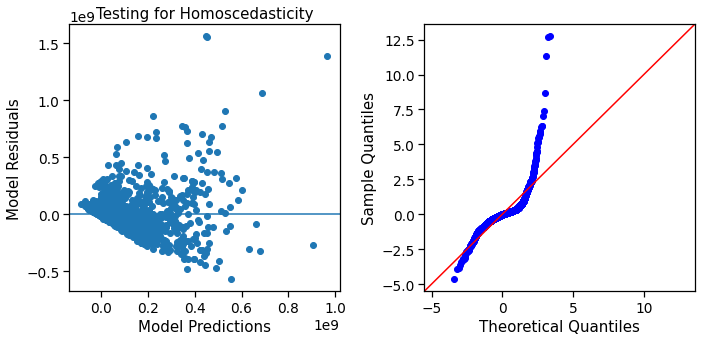

In [169]:
model = sms.OLS(y_train, X_train_ohe).fit()

diagnose_model(model)

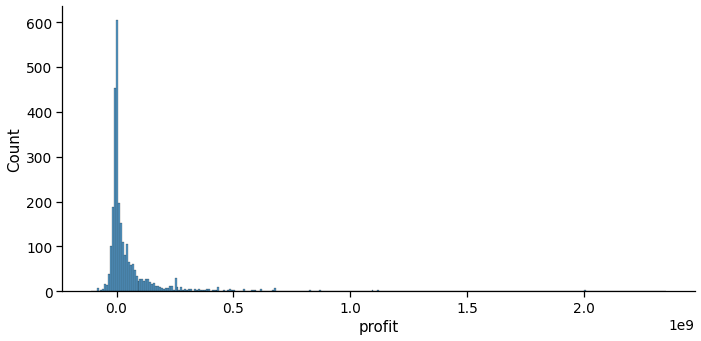

In [176]:
sns.displot(y_train, aspect=2);

* Outliers
* Adding features from other df's at start

# Statistical Testing

# Inferential Modeling

# Predictive Modeling

# Final Results